In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
news = pd.read_csv('News.csv', delimiter = ',')
news = pd.DataFrame(news)

In [3]:
news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
news.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

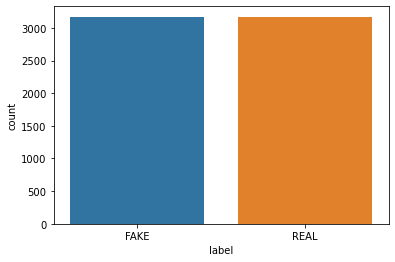

In [6]:
sns.countplot(x='label',data=news)  
plt.show()

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def test_preprocessing(data):
  #creating a list
    all_text = list()
  # converting the text to the list using tolist function
    lines = news['text'].values.tolist()
    #creating a for loop for pre-processing steps for all the text in lines
    for text in lines:
      # the words in text will be converted to lowercase firstly, as it is commonly done
        text = text.lower()
      # As there were https links we need to remove that as well, it is done using the regesx function
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        # apart from https links there are special characters as well, these are defined and then substitued with nothing using the regex function
        text = re.sub(r"[,.\"!$%^&*(){}?/;`~:<>+=-]", "", text)
        # Tokenization of these sentences is also carried out to seperate the sentences and paragraphs, this done using the word_tokenizer package from NLKT
        tokens = word_tokenize(text)
        # Using the string package the punctions are replaced
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        #the words are only kept over here by stripping them off
        words = [word for word in stripped if word.isalpha()]
        # using the stopwords package to remove the stopwordsin english
      
        words = [w for w in words if not w in [stopwords.words('english')]]

        # the pre-processed text is joined over here
        words = ' '.join(words)
        # appending the words 
        all_text.append(words)
    return all_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
news['clean_text'] = test_preprocessing(news)

In [9]:
news

,title,text,label,clean_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,us secretary of state john f kerry said monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and frontrunners ...
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,the state department told the republican natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the p in pbs should stand for plutocratic or p...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,antitrump protesters are tools of the oligarch...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,addis ababa ethiopia obama convened a meeting ...


In [10]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
#Stemming
def stemmer(clean_text):
    tokenized = nltk.word_tokenize(clean_text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])
#Lemmatization 
def lemmatize(clean_text):
    tokenized = nltk.word_tokenize(clean_text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [11]:
def preprocess(clean_text):
    text = stemmer(clean_text)
    text = lemmatize(clean_text)
    return clean_text

In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
t=news['clean_text']
texts_cleaned = []
for t in news['clean_text']:
    texts_cleaned.append(preprocess(t))
news['clean_text']=texts_cleaned


In [14]:
news["clean_text"].duplicated().sum() # There is 288 duplicate value present in the data, so we have to remove them 

288

In [15]:
news.drop_duplicates("clean_text", inplace=True)

In [16]:
news.shape

(6047, 4)

In [17]:
df1 = news[news['label']!= "REAL"]

In [18]:
df2 = news[news['label']== "REAL"]

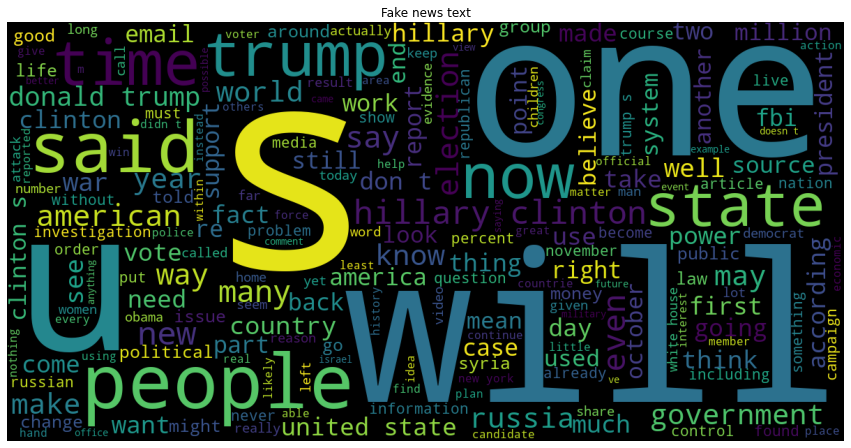

In [20]:
words = ' '.join(df1['clean_text'])
cleaned_word = " ".join([word for word in words.split()])
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                      width=1200,
                      height=600
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Fake news text')
plt.show()

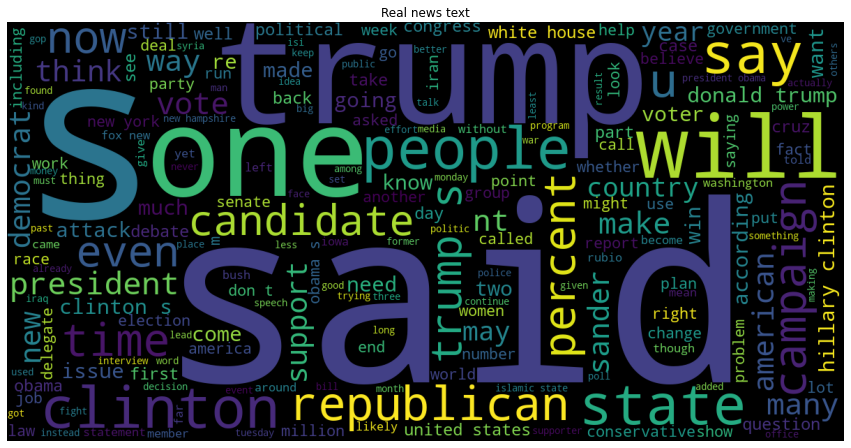

In [21]:
words = ' '.join(df2['clean_text'])
cleaned_word = " ".join([word for word in words.split()])
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                      width=1200,
                      height=600
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Real news text')
plt.show()

In [22]:
# using the label encoder package
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
news['label']= encoder.fit_transform(news['label'])

In [23]:
news['label']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6047, dtype: int32

In [24]:
# using the train test split to split the data into training and testing
from sklearn.model_selection import train_test_split
# inputs will be the text
x = news['text']
# outputs are the types of bullying
y = news['label']
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4837,), (1210,), (4837,), (1210,))

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

In [26]:
# piplining the vectors and machine learning model
Model = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB())])
# training the model by fitting the training sets
Model.fit(x_train, y_train)
# organising the steps
Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
# predicting and scoring the model
Model.score(x_test, y_test)

0.8024793388429752

In [27]:
# initializing the transformer and vectorizer
tfidf = TfidfTransformer()
clf = CountVectorizer()
# transforming the cleaned text
inputs =  clf.fit_transform(news['clean_text'])
# and fitting the transformer with  the inputs
tf_transformer = TfidfTransformer(use_idf=True).fit(inputs)
X_tf = tf_transformer.transform(inputs)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.20)

Test Set Accuracy : 88.09917355371901 %




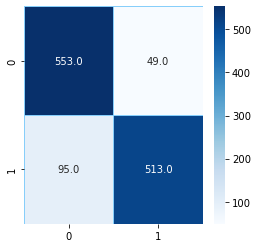

In [29]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score,confusion_matrix
rf_clf = LogisticRegression()
rf_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf = rf_clf.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred_rf) * 100} %\n\n")
# Making the Confusion Matrix 
confm = confusion_matrix(y_test,y_pred_rf)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confm, annot=True, linewidths=1.0,cmap="Blues",linecolor="lightskyblue", fmt= '.1f',ax=ax);

Test Set Accuracy : 78.59504132231405 %




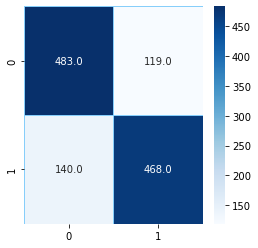

In [30]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score,confusion_matrix
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_dt = dt_clf.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred_dt) * 100} %\n\n")
# Making the Confusion Matrix 
confm = confusion_matrix(y_test,y_pred_dt)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confm, annot=True, linewidths=1.0,cmap="Blues",linecolor="lightskyblue", fmt= '.1f',ax=ax);

Test Set Accuracy : 86.44628099173553 %




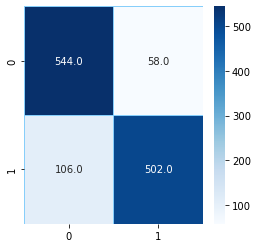

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf = rf_clf.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred_rf) * 100} %\n\n")
# Making the Confusion Matrix 
confm = confusion_matrix(y_test,y_pred_rf)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confm, annot=True, linewidths=1.0,cmap="Blues",linecolor="lightskyblue", fmt= '.1f',ax=ax);

Test Set Accuracy : 87.68595041322314 %




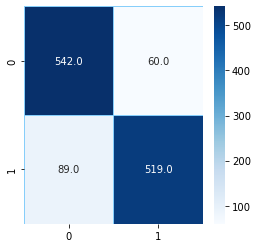

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gd_clf = GradientBoostingClassifier()
gd_clf.fit(X_train, y_train)
y_predL = gd_clf.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, y_predL) * 100} %\n\n")
# Making the Confusion Matrix
confm = confusion_matrix(y_test,y_predL)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confm, annot=True, linewidths=1.0,cmap="Blues",linecolor="lightskyblue", fmt= '.1f',ax=ax);

In [33]:
!pip install xgboost

Test Set Accuracy : 91.07438016528926 %




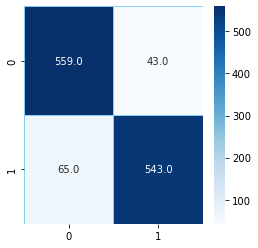

In [34]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train, y_train)
y_predL = model.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, y_predL) * 100} %\n\n")
# Making the Confusion Matrix
confm = confusion_matrix(y_test,y_predL)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confm, annot=True, linewidths=1.0,cmap="Blues",linecolor="lightskyblue", fmt= '.1f',ax=ax);

In [35]:
predicted_df = {'original_values': y_test,'Random_Forest':rf_clf.predict(X_test), 'Decision Tree':dt_clf.predict(X_test), 'Gradient Boosting': gd_clf.predict(X_test),'XGB Classifier':model.predict(X_test)}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,original_values,Random_Forest,Decision Tree,Gradient Boosting,XGB Classifier
3981,1,1,1,1,1
3033,1,1,1,1,1
5936,0,0,0,0,0
5188,1,1,0,1,1
4337,1,1,0,1,1
4320,0,0,0,0,0
37,0,0,1,0,0
743,0,1,0,0,0
2848,0,0,0,0,0
3125,0,0,0,0,0
